In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

: 

In [4]:
%pip install bm3d
# !sudo apt-get install libopenblas-dev
import bm3d
from PIL import Image
import matplotlib.pyplot as plt
import cv2

  Using cached bm3d-4.0.1-py3-none-any.whl (10.0 kB)
  Using cached scipy-1.10.1.tar.gz (42.4 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\Brandon Tran\AppData\Local\Programs\Python\Python38-32\python.exe' 'c:\Users\Brandon Tran\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pip\_vendor\pep517\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\BRANDO~1\AppData\Local\Temp\tmp23ejr00r'
         cwd: C:\Users\Brandon Tran\AppData\Local\Temp\pip-install-vt4ec8zg\scipy
    Complete output (37 lines):
    + meson setup --prefix=c:\Users\Brandon Tran\AppData\Local\Programs\Python\Python38-32 C:\Users\Brandon Tran\AppData\Local\Temp\pip-install-vt4ec8zg\scipy C:\Users\Brandon Tran\AppData\Local\Temp\pip-install-vt4ec8zg\scipy\.mesonpy-487k7veh\build --native-file=C:\Users\Brandon Tran\AppData\Local\Temp\pip-install-vt4ec8zg\scipy\.mesonpy-native-file.ini -Ddebug=false -Doptimization=2
    The Meson build system
    Version: 1.4.0
    Source dir: C:\Users\Brandon Tran\AppData\Local\Temp\pip-install-vt4ec8zg\scipy
    Build dir: C:\Users

ModuleNotFoundError: No module named 'bm3d'

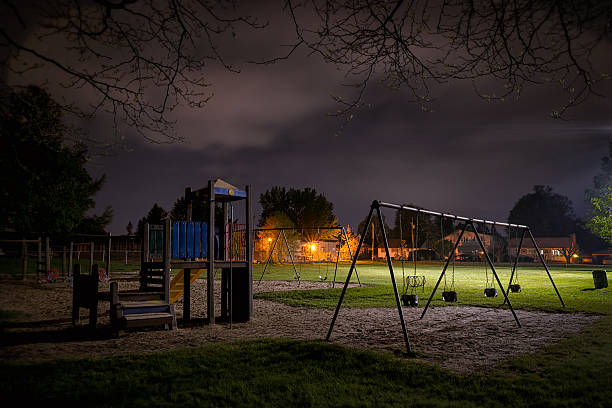

In [10]:
image_noisy = Image.open('sample_data/dark_playground.jpg')
image_noisy

In [11]:
#Can replace HARD_THRESHOLDING with ALL_STAGES, takes longer, looks about the same
denoised_image = bm3d.bm3d(image_noisy, sigma_psd=.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
#plt.imshow(denoised_image)
cv2.imwrite('sample_data/denoised_image.jpg', denoised_image)

True

In [16]:
import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)



print('Downloading Sony subset... (25GB)')
download_file_from_google_drive('10kpAcvldtcb9G2ze5hTcF1odzu4V_Zvh', 'dataset/Sony.zip')
os.system('unzip dataset/Sony.zip -d dataset')